# Business Case Laureate
Eres un(a) consultor(a) responsable de ofrecer respuestas a miembros de una organización. La compañía busca entender cuales de sus empleados son más propensos a abandonar la compañía (incurrir en attrition).

El objetivo es el siguiente:

- Generar un modelo que pueda ser utilizado por la compañía.
- Entender cuáles son las variables que tienen mayor impacto en la tasa de abandono de empleados.
- Proponer una estrategia para disminuir la tasa de abandono. Realizar sugerencias para medir la eficacia de la estrategia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/proyectos/laureate/Employee Attrition.csv')

In [3]:
print('Rows: {}'.format(df.shape[0]))
print('Columns: {}'.format(df.shape[1]))

Rows: 1470
Columns: 28


In [4]:
columns = df.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome(KMs)', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumberCompaniesWorked', 'WorkedOverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimeLastYear(Weeks)', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager'],
      dtype='object')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome(KMs),Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimeLastYear(Weeks),WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,12,3,4,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DistanceFromHome(KMs),Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumberCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimeLastYear(Weeks),WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Descriptive Analysis

It is important to alalyze how the target (attrition) is viewed with a descriptive analysis according with the dependet variables. 

## Target Variable

As we can see in the chart below, we have an unbalanced dataset. 

No     1233
Yes     237
Name: Attrition, dtype: int64


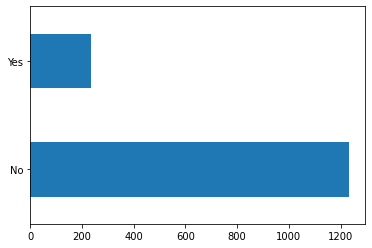

In [7]:
target = 'Attrition'

print(df[target].value_counts())
df[target].value_counts().plot(kind='barh');

In [150]:
237/(1233+237)

0.16122448979591836

## Dependent Variables

In [8]:
dependent_variables = [x for x in columns if x not in [target]]

In [9]:
# len(dependent_variables)

### Categorical Data

First, we are going to analyze the categorical varaibles according to the target variable. 

For each variable, we can see in each chart below, the percentage of Attrition employees in each category. 

If the percentage of Attrition employee is high, this category would be a good predictor.

In [10]:
categorical = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
            'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
            'NumberCompaniesWorked','WorkedOverTime','PercentSalaryHike','PerformanceRating',
            'RelationshipSatisfaction','TrainingTimeLastYear(Weeks)','WorkLifeBalance']
len(categorical)

18

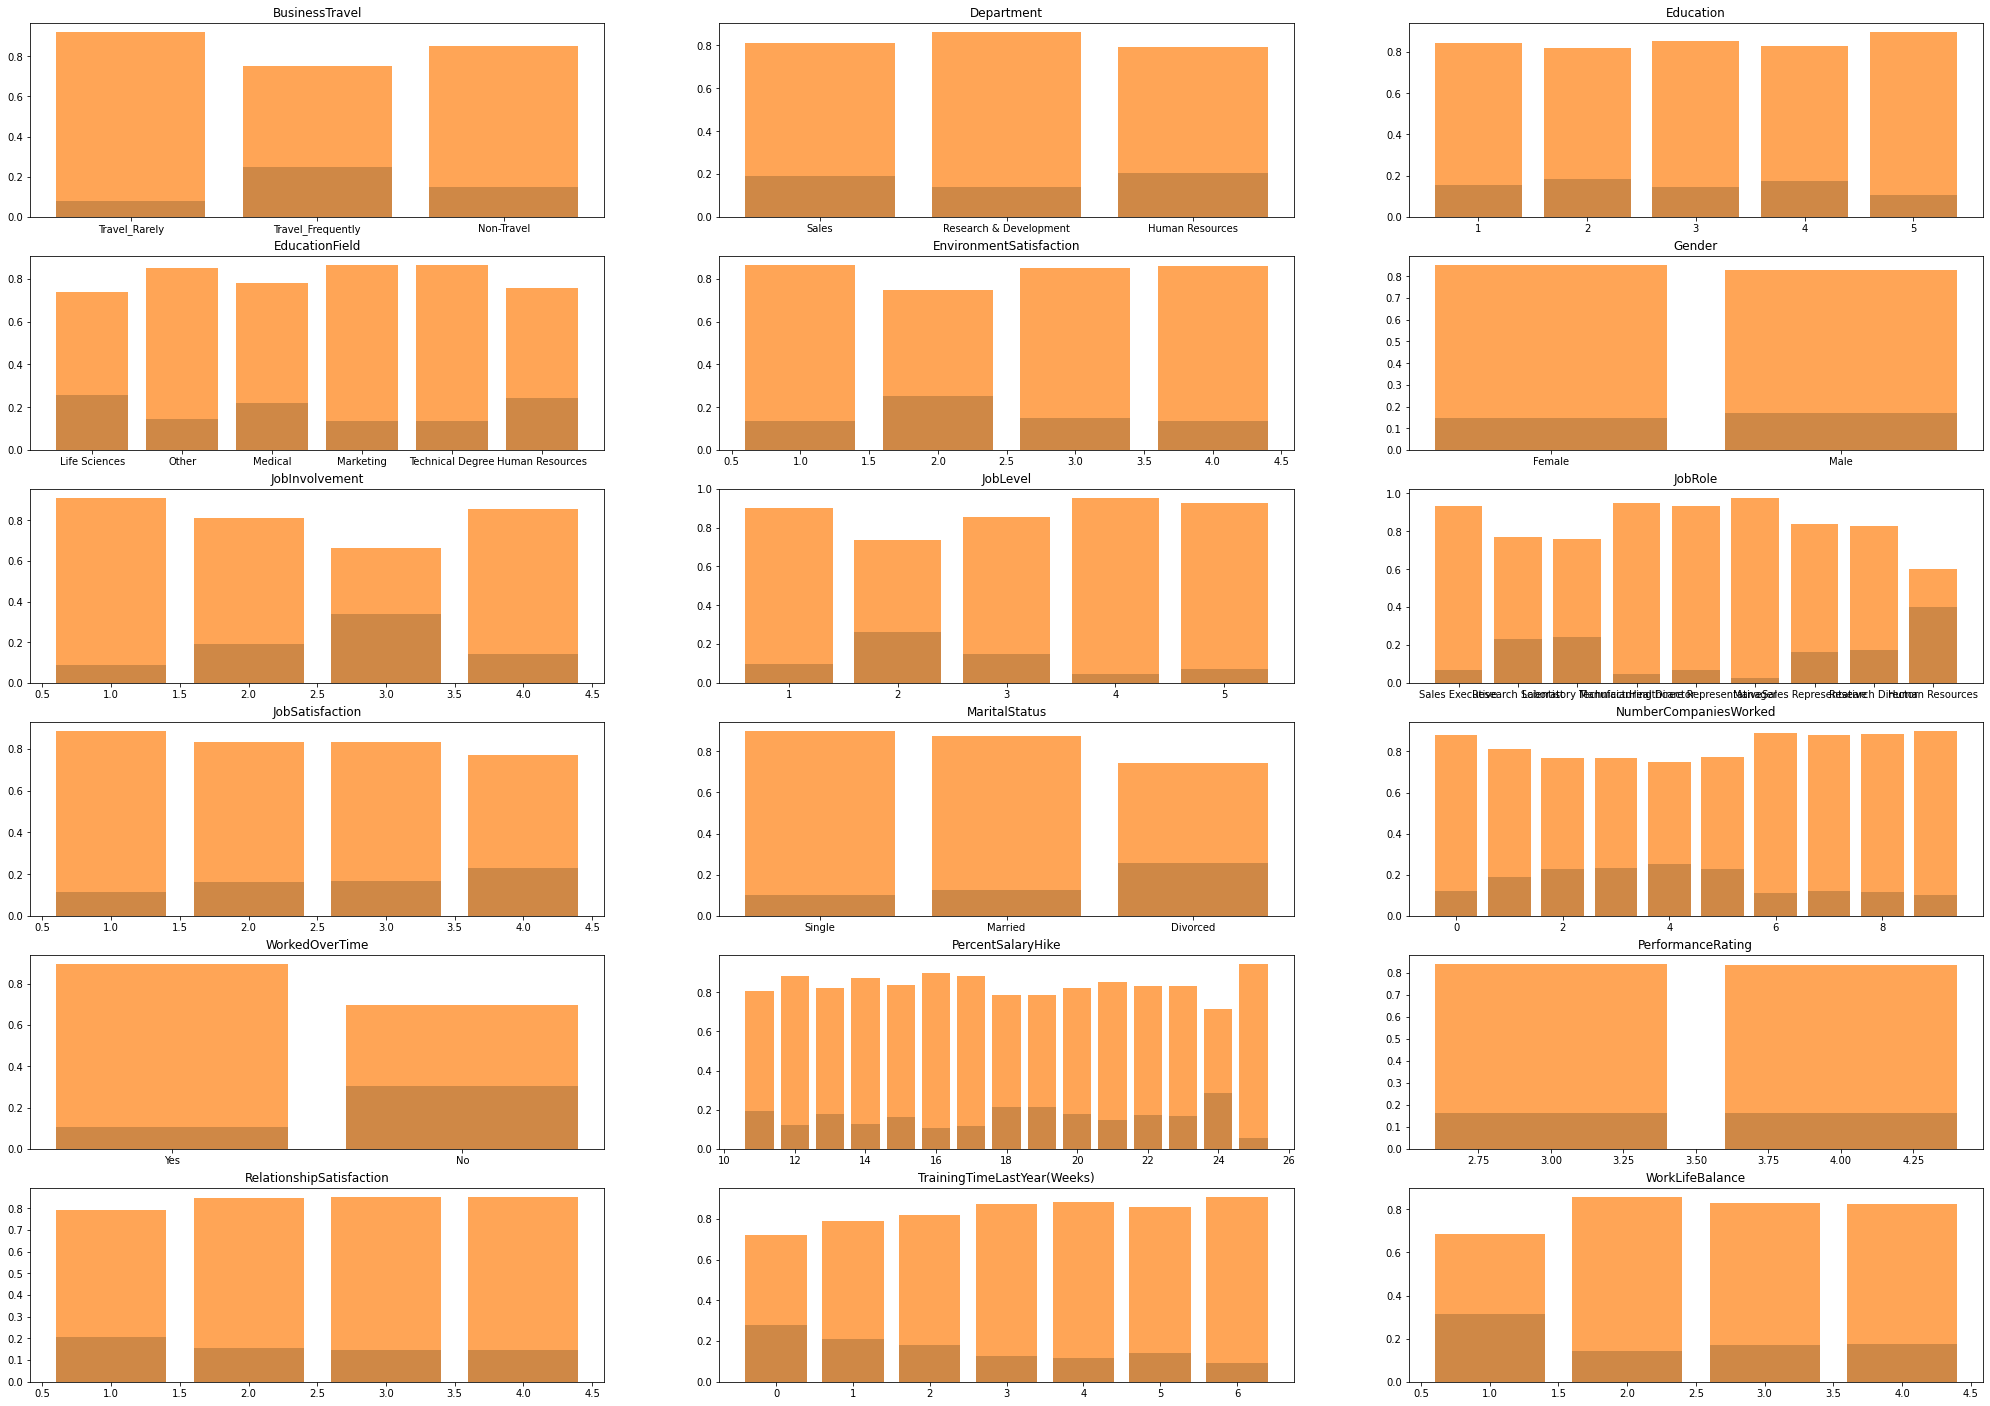

In [11]:
rows= int(len(categorical)/3)
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(35,25))

temp_col = 0
for i in range(rows): 
    for j in range(cols): 

        temp = df.groupby([categorical[temp_col], 'Attrition']).count()['Age'].reset_index()
        temp1 = temp.pivot(categorical[temp_col], 'Attrition', 'Age')
        temp1['all'] = temp1['Yes']+temp1['No']
        temp1['Yes'] = temp1['Yes']/temp1['all']
        temp1['No'] = temp1['No']/temp1['all']

        axes[i, j].bar(df[categorical[temp_col]].unique(), temp1['Yes'], alpha = 0.7)
        axes[i, j].bar(df[categorical[temp_col]].unique(), temp1['No'], alpha = 0.7)

        # axes[i, j].bar(df[categorical[temp]].unique(), df[categorical[temp]].value_counts())
        axes[i, j].set_title(categorical[temp_col])
        temp_col += 1

In [12]:
for column in categorical: 
    temp = df.groupby([column, 'Attrition']).count()['Age'].reset_index()
    temp1 = temp.pivot(column, 'Attrition', 'Age')
    temp1['ratio_attrition'] = temp1['Yes']/(temp1['Yes']+temp1['No'])
    print('---------{}----------'.format(column))
    print(temp1)

---------BusinessTravel----------
Attrition           No  Yes  ratio_attrition
BusinessTravel                              
Non-Travel         138   12         0.080000
Travel_Frequently  208   69         0.249097
Travel_Rarely      887  156         0.149569
---------Department----------
Attrition                No  Yes  ratio_attrition
Department                                       
Human Resources          51   12         0.190476
Research & Development  828  133         0.138398
Sales                   354   92         0.206278
---------Education----------
Attrition   No  Yes  ratio_attrition
Education                           
1          139   31         0.182353
2          238   44         0.156028
3          473   99         0.173077
4          340   58         0.145729
5           43    5         0.104167
---------EducationField----------
Attrition          No  Yes  ratio_attrition
EducationField                             
Human Resources    20    7         0.259259
Life Sc

As we can see in the charts above, the following varaibles are the most significant graphically. 

- BusinessTravel
- EducationField
- EnvironmentSatisfaction
- JobInvolvement
- MaritalStatus
- NumberCompaniesWorked
- WorkedOverTime
- TrainingTimeLastYear(Weeks)
- WorkLifeBalance

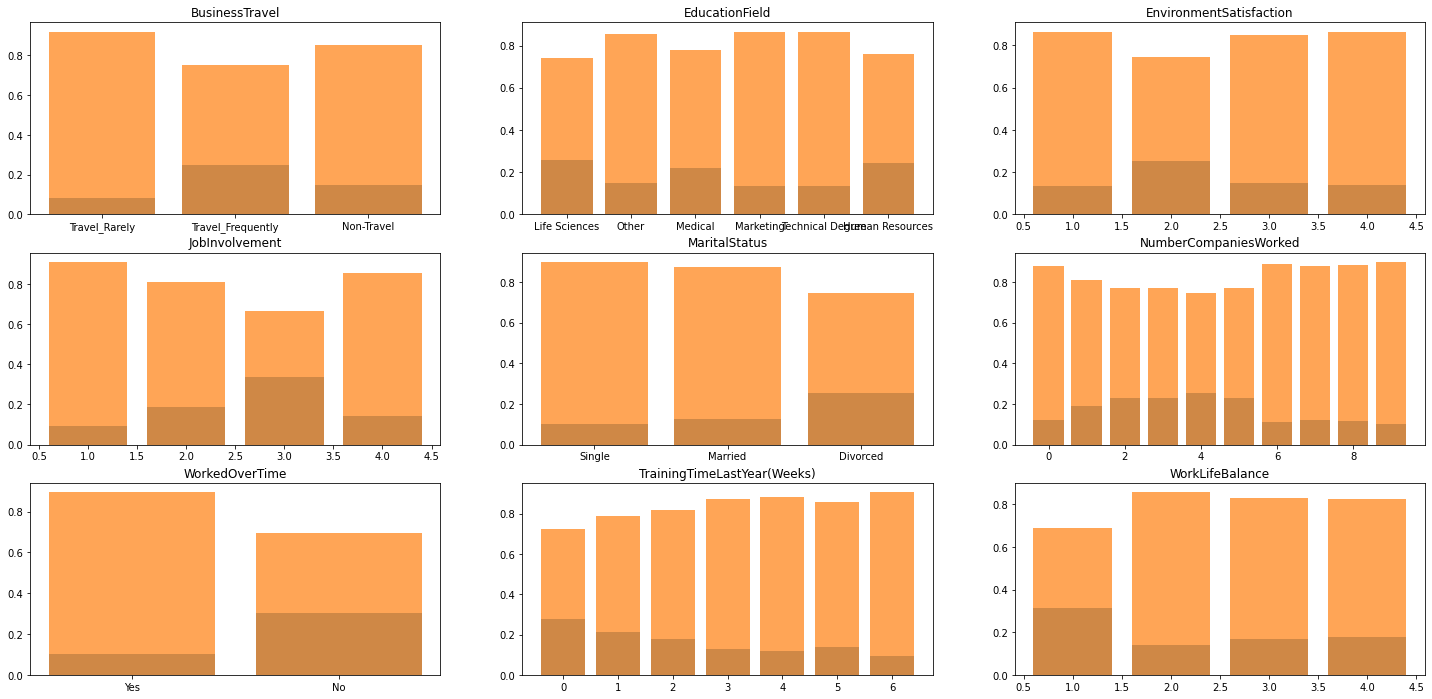

In [13]:
most_important_cat = ['BusinessTravel','EducationField','EnvironmentSatisfaction','JobInvolvement',
                      'MaritalStatus','NumberCompaniesWorked','WorkedOverTime','TrainingTimeLastYear(Weeks)',
                      'WorkLifeBalance']

rows= int(len(most_important_cat)/3)
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25,12))

temp_col = 0
for i in range(rows): 
    for j in range(cols): 

        temp = df.groupby([most_important_cat[temp_col], 'Attrition']).count()['Age'].reset_index()
        temp1 = temp.pivot(most_important_cat[temp_col], 'Attrition', 'Age')
        temp1['all'] = temp1['Yes']+temp1['No']
        temp1['Yes'] = temp1['Yes']/temp1['all']
        temp1['No'] = temp1['No']/temp1['all']

        axes[i, j].bar(df[most_important_cat[temp_col]].unique(), temp1['Yes'], alpha = 0.7)
        axes[i, j].bar(df[most_important_cat[temp_col]].unique(), temp1['No'], alpha = 0.7)

        # axes[i, j].bar(df[categorical[temp]].unique(), df[categorical[temp]].value_counts())
        axes[i, j].set_title(most_important_cat[temp_col])
        temp_col += 1

### Continue Variables

We can see how the continuation variables can be seen with the target variable.

In [14]:
continue_columns = [x for x in dependent_variables if x not in categorical]
len(continue_columns)

9

In [15]:
continue_columns

['Age',
 'DistanceFromHome(KMs)',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrentManager']

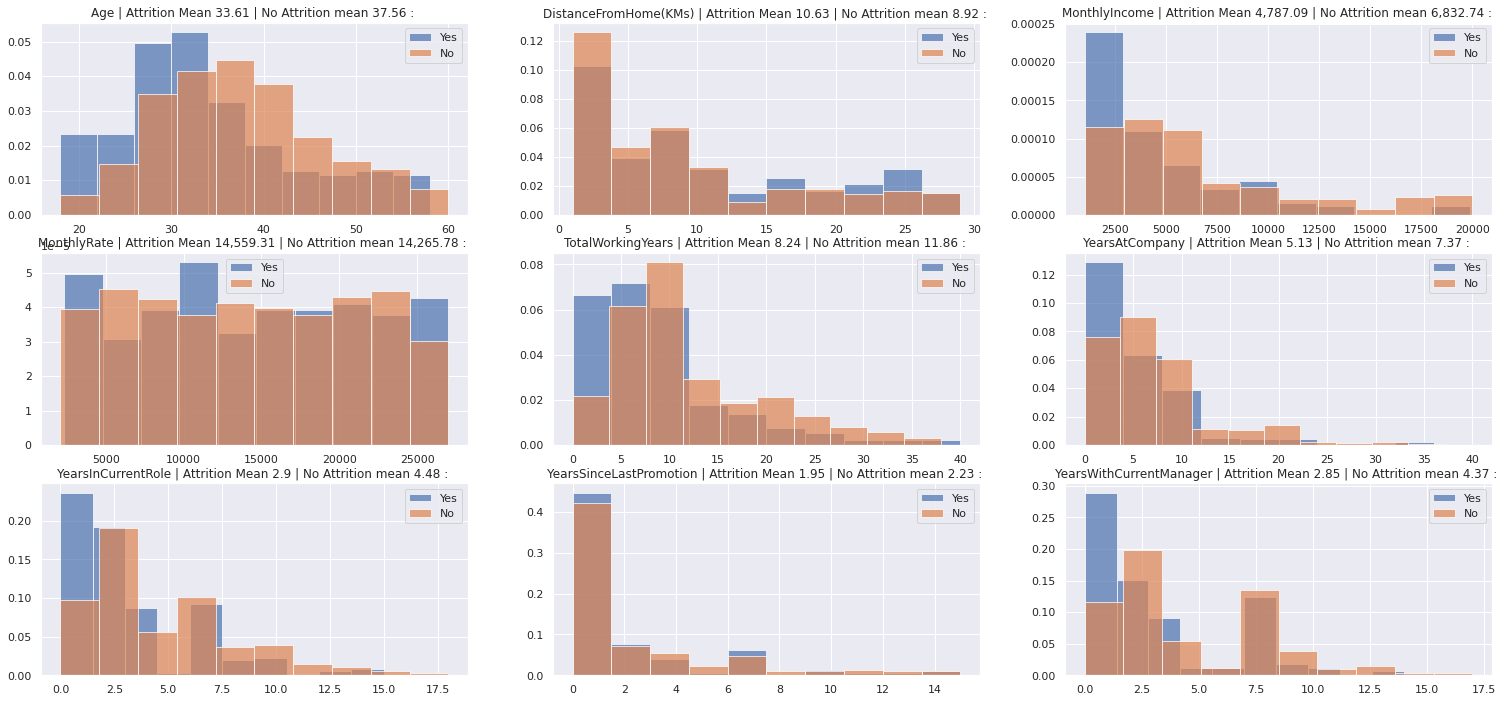

In [16]:
rows= int(len(continue_columns)/3)
cols = 3

sns.set()

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(26,12))

temp = 0
for i in range(rows): 
    for j in range(cols): 
        axes[i, j].hist(df[continue_columns[temp]][df['Attrition'] == 'Yes'], density = True, alpha = 0.7)
        axes[i, j].hist(df[continue_columns[temp]][df['Attrition'] == 'No'], density = True, alpha = 0.7)
        axes[i, j].legend(['Yes', 'No'])
        axes[i, j].set_title("{} | Attrition Mean {:,} | No Attrition mean {:,} : ".format(continue_columns[temp], 
                                                                                       round(df[continue_columns[temp]][df['Attrition'] == 'Yes'].mean(), ndigits=2), 
                                                                                       round(df[continue_columns[temp]][df['Attrition'] == 'No'].mean(), ndigits=2)),fontsize = 12)
        temp += 1

As we can see in the charts above, the following varaibles are the most significant graphically. 

- Age
- MonthlyIncome
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsWithCurrentManager

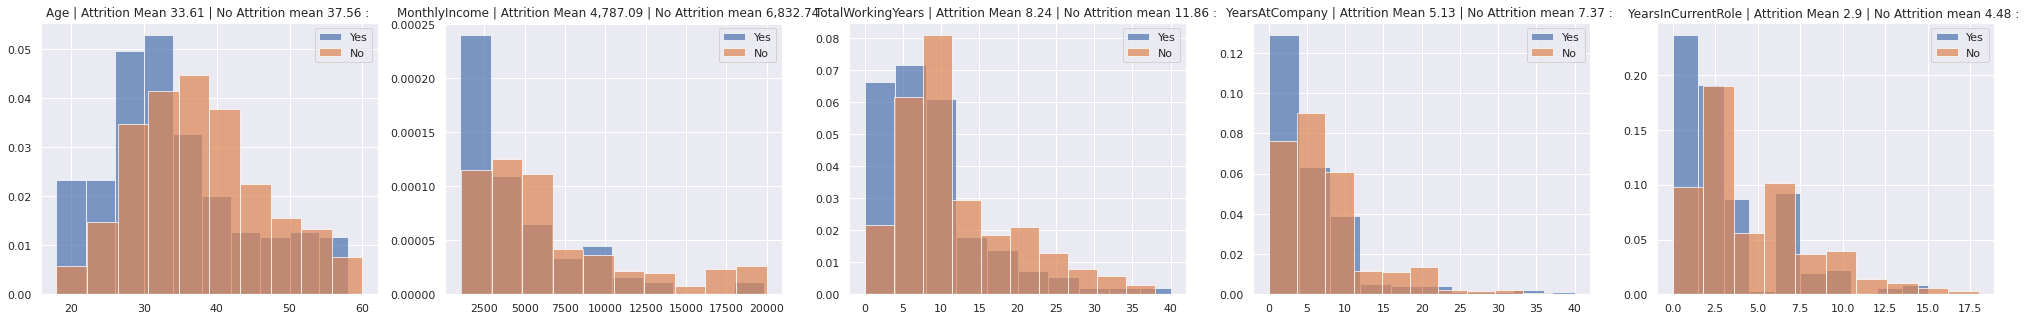

In [17]:
most_important_cont = ['Age','MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
                        'YearsInCurrentRole',  'YearsWithCurrentManager']

rows= 1
cols = 5

sns.set()

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(35,5))

temp = 0
for i in range(rows): 
    for j in range(cols): 
        axes[j].hist(df[most_important_cont[temp]][df['Attrition'] == 'Yes'], density = True, alpha = 0.7)
        axes[j].hist(df[most_important_cont[temp]][df['Attrition'] == 'No'], density = True, alpha = 0.7)
        axes[j].legend(['Yes', 'No'])
        axes[j].set_title("{} | Attrition Mean {:,} | No Attrition mean {:,} : ".format(most_important_cont[temp], 
                                                                                       round(df[most_important_cont[temp]][df['Attrition'] == 'Yes'].mean(), ndigits=2), 
                                                                                       round(df[most_important_cont[temp]][df['Attrition'] == 'No'].mean(), ndigits=2)),fontsize = 12)
        temp += 1

# Pipeline

Data processing will be applied with the following methodology. 

- Missing Treatment 
- Categorical Data to numeric data 


## Missing Treatment 

In [18]:
df.isnull().sum()

Age                            0
Attrition                      0
BusinessTravel                 0
Department                     0
DistanceFromHome(KMs)          0
Education                      0
EducationField                 0
EnvironmentSatisfaction        0
Gender                         0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumberCompaniesWorked          0
WorkedOverTime                 0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
TotalWorkingYears              0
TrainingTimeLastYear(Weeks)    0
WorkLifeBalance                0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrentManager        0
dtype: int64

There are not missings 

### Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1470 non-null   int64 
 1   Attrition                    1470 non-null   object
 2   BusinessTravel               1470 non-null   object
 3   Department                   1470 non-null   object
 4   DistanceFromHome(KMs)        1470 non-null   int64 
 5   Education                    1470 non-null   int64 
 6   EducationField               1470 non-null   object
 7   EnvironmentSatisfaction      1470 non-null   int64 
 8   Gender                       1470 non-null   object
 9   JobInvolvement               1470 non-null   int64 
 10  JobLevel                     1470 non-null   int64 
 11  JobRole                      1470 non-null   object
 12  JobSatisfaction              1470 non-null   int64 
 13  MaritalStatus                1470

In [20]:
categorical_features = [col for col in df.columns if df[col].dtype == "object"]

In [21]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'WorkedOverTime']

In [22]:
one_hot_enc = []

for col in categorical_features:
    one_hot_enc.append(pd.get_dummies(df[col], drop_first=True)) # drop_first quita la primera columna

In [23]:
one_hot_enc[0].columns = ['Attrition']

In [24]:
one_hot_enc[7].columns = ['WorkedOverTime']

In [25]:
df.drop(categorical_features,axis=1,inplace=True)

In [26]:
one_hot_enc.append(df)

In [27]:
df = pd.concat(one_hot_enc,axis=1)

In [28]:
len(df.columns)

42

## Train Test Split


Let's start by splitting our data into a training set and test set.


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y = df['Attrition']
X = df[[col for col in df.columns if col != 'Attrition']]

In [31]:
X.columns

Index(['Travel_Frequently', 'Travel_Rarely', 'Research & Development', 'Sales',
       'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree',
       'Male', 'Human Resources', 'Laboratory Technician', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'Married', 'Single',
       'WorkedOverTime', 'Age', 'DistanceFromHome(KMs)', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumberCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimeLastYear(Weeks)', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager'],
      dtype='object')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                    random_state=101)

In [33]:
X_train.shape, X_test.shape

((1176, 41), (294, 41))

## Variable Reduction

We will use information value as a method to variable reduction

Information Value analysis is a data exploration technique that helps determine which columns in a data set have predictive power or influence on the value of a specified dependent variable.

In [48]:
def information_value(var, TARGET): 
    bucket = 10
    try: 
        df['bucket'] = pd.cut(df[var], bucket, duplicates = 'drop')
        grouped = df.groupby('bucket', as_index = False).agg({var:['count'], TARGET: 'sum'})
        grouped.columns = ["_".join(item) for item in grouped.columns]
        grouped["No_{}".format(TARGET)] = grouped[grouped.columns[1]] - grouped[grouped.columns[2]]
        grouped['dist_event'] = grouped["{}_sum".format(TARGET)]/grouped["{}_sum".format(TARGET)].sum()
        grouped['dist_no_event'] = grouped["No_{}".format(TARGET)]/grouped["No_{}".format(TARGET)].sum()
        grouped['WOE'] = np.log(grouped['dist_no_event']/grouped['dist_event'])
        grouped['IV'] = (grouped['dist_no_event']-grouped['dist_event'])*grouped['WOE']
        inf_value = grouped['IV'].sum()
    except: 
        pass
    return inf_value

In [53]:
TARGET = 'Attrition'

df_inf_value = {'column': [], 
                'IV': []}

for var in X_train.columns: 
    df_inf_value['column'].append(var)
    df_inf_value['IV'].append(information_value(var, TARGET))

inf_value = pd.DataFrame.from_dict(df_inf_value)

In [58]:
inf_value[inf_value['IV'] >= 0.02].sort_values(by = 'IV', ascending=False)

,column,IV
40,YearsWithCurrentManager,inf
38,YearsInCurrentRole,inf
37,YearsAtCompany,inf
28,MonthlyIncome,inf
20,WorkedOverTime,0.400183
26,JobLevel,0.384152
34,TotalWorkingYears,0.349070
21,Age,0.322755
19,Single,0.211503
17,Sales Representative,0.132458


In [59]:
final_columns = list(inf_value['column'])

In [61]:
len(final_columns)

41

In [63]:
X_train = X_train[final_columns]
X_test = X_test[final_columns]

# Modeling

## Logistic Regression model

A logistic Regression model was trained 


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [66]:
predictions = logmodel.predict(X_test)

### Evaluation

We can check precision,recall,f1-score using classification report

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       249
           1       0.17      0.02      0.04        45

    accuracy                           0.83       294
   macro avg       0.51      0.50      0.47       294
weighted avg       0.74      0.83      0.78       294



In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test, predictions)

array([[244,   5],
       [ 44,   1]])

We do not perform well according to the confusion matrix. 
We do not predict Attrition because we have an unbalanced data set.

Therefore, we can apply another methodologies. 

## Balanced Method with Logistic Regression

In [87]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test, pred_test))
accuracy_score(y_test, pred_test)

The f1 score for the testing data: 0.4545454545454545
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       249
           1       0.34      0.67      0.45        45

    accuracy                           0.76       294
   macro avg       0.64      0.72      0.65       294
weighted avg       0.84      0.76      0.78       294

[[192  57]
 [ 15  30]]


0.7551020408163265

The confusion matrix is better. 

Therefore, we can apply another techniques like XGBoost models

## Machine Learning Model (XGBoost)

In [108]:
from xgboost import XGBClassifier
from sklearn.model_selection import ParameterGrid

### Hyperparameter Tunning

In [109]:
params = {'n_estimators': [10, 15, 20, 25, 30 ,40], 
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.25, 0.35], 
          'max_depth': [3,4,6,8,10,15], 
          'colsample_bytree': [0.6,0.7,0.8], 
          'subsample': [0.7,0.8,1],
          'min_child_weight': [1,2,4]}

parameter_values = ParameterGrid(params)

In [110]:
# dir(model)
# model.feature_importances_

In [111]:
metrics = {'config': [], 
           'accuracy_train': [], 
           'f1_train': [], 
           'accuracy_test': [], 
           'f1_test': []
           }

for parameter_grid in parameter_values: 
    print(parameter_grid)
    xgb = XGBClassifier(n_jobs=4, random_state = 123)
    estimator = xgb.set_params(**parameter_grid)
    model = estimator.fit(X_train, y_train)

    
    # Predicting on the test data
    pred_test = model.predict(X_test)
    pred_train = model.predict(X_train)

    #Calculating and printing the f1 score 
    f1_test = f1_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)

    print('\tThe f1 score | Train: {} | Test: {}'.format(np.round(f1_train,2), np.round(f1_test,2)))
    
    accuracy_test = accuracy_score(y_test, pred_test)
    accuracy_train = accuracy_score(y_train, pred_train)
    
    print('\tAccuracy score | Train: {} | Test: {}'.format(np.round(accuracy_train,2), np.round(accuracy_test,2)))

    metrics['config'].append(parameter_grid)
    metrics['accuracy_train'].append(accuracy_train)
    metrics['f1_train'].append(f1_train)
    metrics['accuracy_test'].append(accuracy_test)
    metrics['f1_test'].append(f1_test)

    df_metrics = pd.DataFrame.from_dict(metrics)
    df_metrics.to_csv('metrics_models.csv')


Streaming output truncated to the last 5000 lines.
	The f1 score | Train: 0.73 | Test: 0.33
	Accuracy score | Train: 0.93 | Test: 0.86
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 20, 'subsample': 1}
	The f1 score | Train: 0.77 | Test: 0.28
	Accuracy score | Train: 0.94 | Test: 0.84
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 25, 'subsample': 0.7}
	The f1 score | Train: 0.62 | Test: 0.31
	Accuracy score | Train: 0.91 | Test: 0.86
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 25, 'subsample': 0.8}
	The f1 score | Train: 0.72 | Test: 0.33
	Accuracy score | Train: 0.93 | Test: 0.86
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 25, 'subsample': 1}
	The f1 score | Train: 0.78 | Test: 0.29
	Accuracy score | Train: 0.94 | Test: 0.85
{'colsample_bytree': 0.8,

## BEST MODEL

In [125]:
best_model = df_metrics.sort_values('accuracy_test', ascending = False).head(1)['config'].iloc[0]
best_model

{'colsample_bytree': 0.7,
 'learning_rate': 0.25,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 30,
 'subsample': 0.7}

In [132]:
print('BEST MODEL')

print(best_model)
xgb = XGBClassifier(n_jobs=4, random_state = 123)
estimator = xgb.set_params(**best_model)
model = estimator.fit(X_train, y_train)

# Predicting on the test data
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
f1_train = f1_score(y_train, pred_train)

print('\tThe f1 score | Train: {} | Test: {}'.format(np.round(f1_train,5), np.round(f1_test,5)))

accuracy_test = accuracy_score(y_test, pred_test)
accuracy_train = accuracy_score(y_train, pred_train)

print('\tAccuracy score | Train: {} | Test: {}'.format(np.round(accuracy_train,5), np.round(accuracy_test,5)))

print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test, pred_test))

BEST MODEL
{'colsample_bytree': 0.7, 'learning_rate': 0.25, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 30, 'subsample': 0.7}
	The f1 score | Train: 0.69536 | Test: 0.54545
	Accuracy score | Train: 0.92177 | Test: 0.89796
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       249
           1       0.86      0.40      0.55        45

    accuracy                           0.90       294
   macro avg       0.88      0.69      0.74       294
weighted avg       0.89      0.90      0.88       294

[[246   3]
 [ 27  18]]


In [142]:
feature_importance = pd.DataFrame({'Columns': final_columns, 
                                    'realtive_importance': model.feature_importances_})

feature_importance = feature_importance.sort_values(by = 'realtive_importance', ascending = False)

feature_importance['cumulative_importance'] = feature_importance['realtive_importance'].cumsum()
feature_importance.to_csv('feature_importance.csv')

In [151]:
feature_importance.head(15)

,Columns,realtive_importance,cumulative_importance
16,Sales Executive,0.070751,0.070751
26,JobLevel,0.069059,0.139810
20,WorkedOverTime,0.052952,0.192762
19,Single,0.049556,0.242317
28,MonthlyIncome,0.041586,0.283903
21,Age,0.037839,0.321742
25,JobInvolvement,0.036529,0.358271
24,EnvironmentSatisfaction,0.035663,0.393934
15,Research Scientist,0.035411,0.429344
37,YearsAtCompany,0.033339,0.462683


In [147]:
import pickle

# save the model to disk
filename = 'best_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8979591836734694


In [149]:
model.score(X_test, y_test)

0.8979591836734694